3. Write a program to clip a line using Cohen Sutherland line clipping algorithm.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
INSIDE      =  0  # 0000
LEFT        =  1  # 0001
RIGHT       =  2  # 0010
BOTTOM      =  4  # 0100
BOTTOM_LEFT =  5  # 0101
BOTTOM_RIGHT=  6  # 0110
TOP         =  8  # 1000
TOP_LEFT    =  9  # 1001
TOP_RIGHT   = 10  # 1010


In [36]:
def print_clipping(P, Q, end_points, window, fig_size=(16, 6)):
    """ 
    print clippings.
    Argument:
        P (tuple)               : starting co-ordinate of line(x1, y1).
        Q (tuple)               : ending co-ordinate of line(x2, y2).
        end_points (tuple)      : end points after clipping.(x1, y1, x2, y2)
        window (tuple)          : clipping window. (x_min, y_min, x_max, y_max)
    Return:
        None
        
    """
    x1, y1 = P
    x2, y2 = Q
    x_min, y_min, x_max, y_max = window
    x_f1 , y_f1, x_f2, y_f2 = end_points
    window_x = [x_min, x_min, x_max, x_max, x_min]
    window_y = [y_min, y_max, y_max, y_min, y_min]

    X_LIM_LOWER = min(x1, x2, x_min, x_max) - 5
    X_LIM_UPPER = max(x1, x2, x_min, x_max) + 5
    Y_LIM_LOWER = min(y1, y2, y_min, y_max) - 5
    Y_LIM_UPPER = max(y1, y2, y_min, y_max) + 5

    fig, ax =plt.subplots(1, 2, figsize=fig_size)
    for i in range(len(ax)):
        ax[i].set_xlim((X_LIM_LOWER, X_LIM_UPPER))
        ax[i].set_ylim((Y_LIM_LOWER, Y_LIM_UPPER))
        ax[i].plot(window_x, window_y, c='r')
        
    ax[0].set_title("Before clipping", fontsize=16)
    ax[1].set_title("After clipping", fontsize=16)
    
    ax[0].plot([x1, x2], [y1, y2])
    ax[1].plot([x_f1, x_f2], [y_f1, y_f2])
    

In [37]:
def compute_code(x, y, window):
    """
    compute code.
    Argument:
        x (scaler)      : x-coordinate.
        y (scaler)      : x-coordinate.
        window (tuple)  : clipping window. (x_min, y_min, x_max, y_max)
    Return:
        code (scaler)   :
    """
    x_min, y_min, x_max, y_max = window
    CODE = INSIDE
    if x < x_min:
        CODE = CODE | LEFT
    if x > x_max:
        CODE = CODE | RIGHT
    if y < y_min:
        CODE = CODE | BOTTOM
    if y > y_max:
        CODE = CODE | TOP
    
    return CODE

In [38]:
def line_clipping(P, Q, window):
    """ 
    line clipping using cohen and sutherland algorithm.
    Argument:
        P (tuple)               : starting co-ordinate of line(x1, y1).
        Q (tuple)               : ending co-ordinate of line(x2, y2).
        window (tuple)          : clipping window. (x_min, y_min, x_max, y_max)
    Return:
        co_ordinates (tuple)    : final end points of line after clipping

    """

    x1, y1 = P
    x2, y2 = Q
    x_min, y_min, x_max, y_max = window

    code_1 = compute_code(x1, y1, window)
    code_2 = compute_code(x2, y2, window)
    flag = False
    while True:
        if (code_1 or code_2) == 0:
            flag = True
            break
        elif (code_1 and code_2) != 0:
            break

        else:
            x = 0.
            y = 0. 
    
            if code_1 == 0:
                code_in = code_1
                code_out = code_2
            else:
                code_in = code_2
                code_out = code_1
            
            if code_out and TOP:
                x = (y_max - y1) * (x2 - x1) / (y2 - y1) + x1
                y = y_max
            elif code_out and BOTTOM:
                x = (y_min - y1) * (x2 - x1) / (y2 - y1) + x1
                y = y_min
            elif code_out and LEFT:
                x = x_min
                y = (x_min - x1) * (y2 - y1) / (x2 - x1) + y1
            elif code_out and RIGHT:
                x = x_max
                y = (x_max - x1) * (y2 - y1) / (x2 - x1) + y1
            
            if code_out == code_1:
                x1 = x
                y1 = y
                code_1 = compute_code(x1, y1, window)
            elif code_out == code_2:
                x2 = x
                y2 = y
                code_2 = compute_code(x2, y2, window)
    
    if flag == False:
        print("line is not visible.")
    else:
        print("end co-ordinates after clipping :(x1, y1), (x2, y2) = (%.2f, %.2f), (%.2f, %.2f)" %(x1, y1, x2, y2))
        end_points = (x1, y1, x2, y2)
        print_clipping(P, Q, end_points, window)

end co-ordinates after clipping :(x1, y1), (x2, y2) = (-1.00, 5.00), (0.33, 6.00)


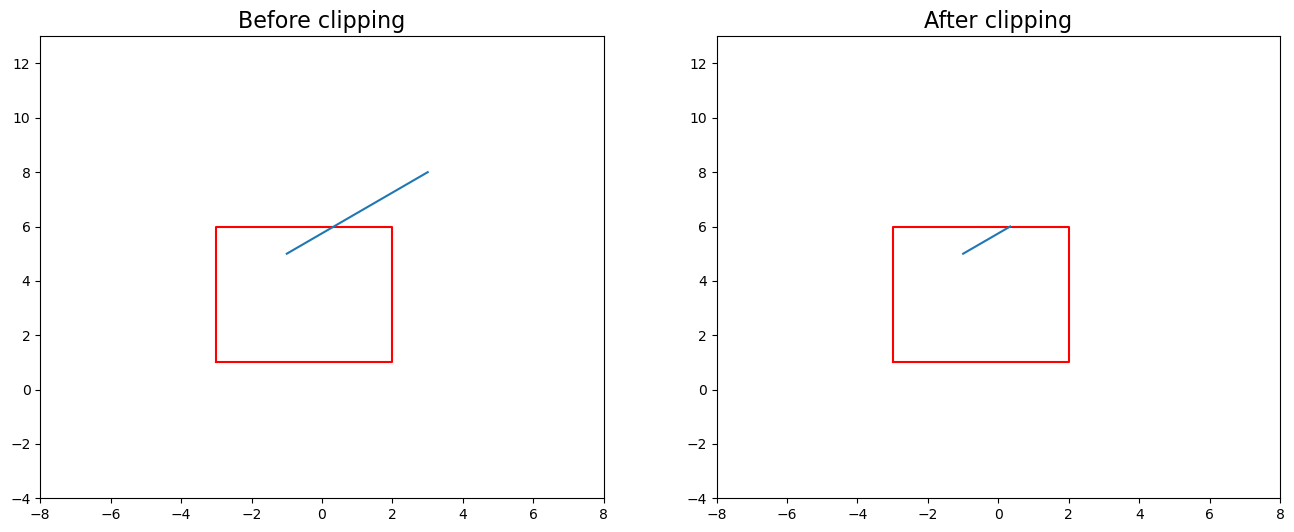

In [39]:
window = (-3, 1, 2, 6)
P = (-1, 5)
Q = (3, 8)

line_clipping(P, Q, window)

end co-ordinates after clipping :(x1, y1), (x2, y2) = (-2.00, 2.00), (-1.20, 6.00)


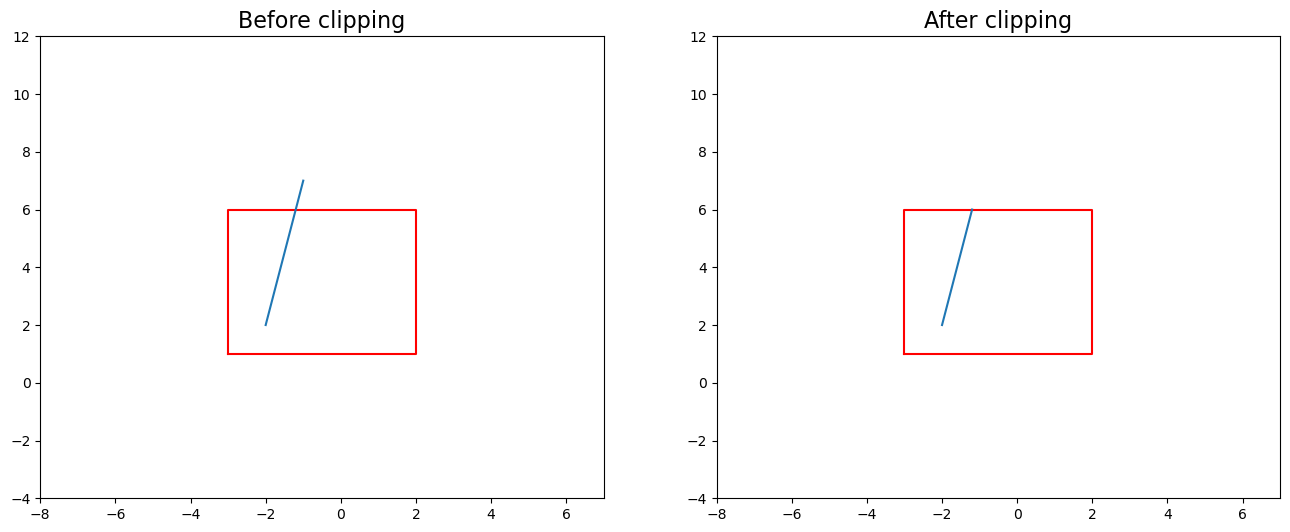

In [40]:
window = (-3, 1, 2, 6)
P = (-2, 2)
Q = (-1, 7)

line_clipping(P, Q, window)